In [1]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


In [2]:
iris = load_iris()


In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0

In [4]:
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

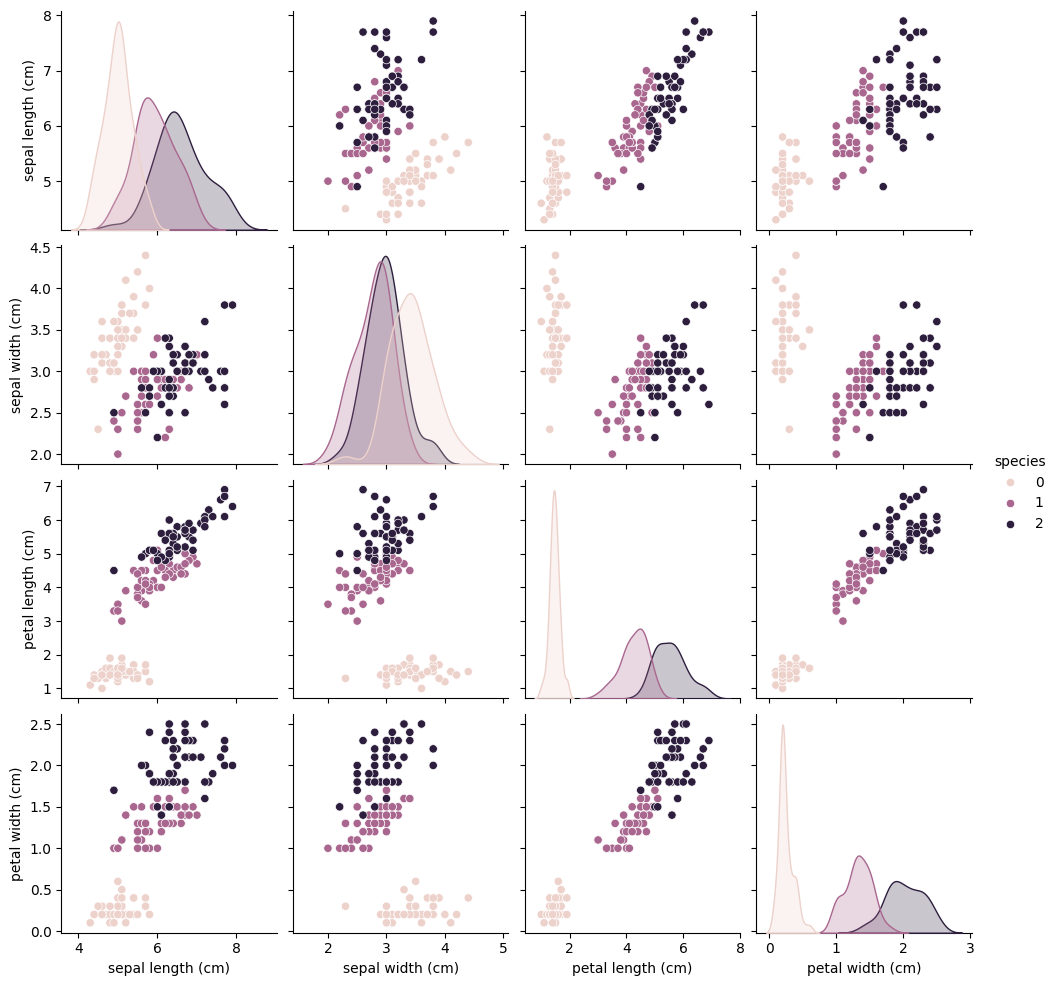

In [6]:
sns.pairplot(data = df, hue = 'species')

In [14]:
for i in range(1,6):
    X2 = X[['sepal length (cm)', 'sepal width (cm)','petal length (cm)','petal width (cm)']]
    tModel = DecisionTreeClassifier(max_depth = i,min_samples_leaf=2, min_samples_split=5).fit(X2, y)
    tree1 = export_text(tModel, feature_names = list(X2.columns))
    print(tree1)
    print("\n\n\n")

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- class: 1





|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2





|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2





|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- sepal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  4.95
|   |   |   |   |---

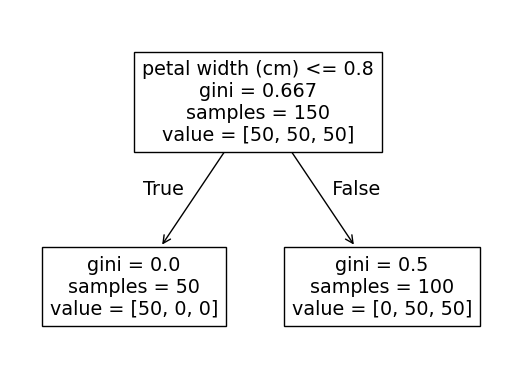

In [8]:
X2 = X[['sepal length (cm)', 'sepal width (cm)','petal length (cm)','petal width (cm)']]
tModel = DecisionTreeClassifier(max_depth = 1,min_samples_leaf=2, min_samples_split=5).fit(X2, y)
treePlot = plot_tree(tModel, feature_names=list(X2.columns), filled = False)
treePlot;


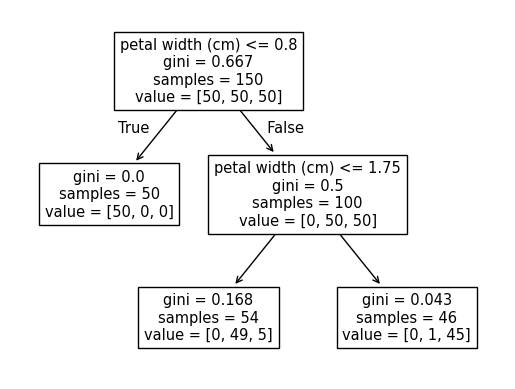

In [9]:
X2 = X[['sepal length (cm)', 'sepal width (cm)','petal length (cm)','petal width (cm)']]
tModel = DecisionTreeClassifier(max_depth = 2,min_samples_leaf=2, min_samples_split=5).fit(X2, y)
treePlot = plot_tree(tModel, feature_names=list(X2.columns), filled = False)
treePlot;


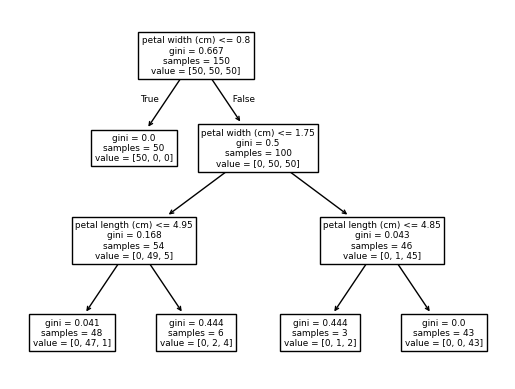

In [10]:
X2 = X[['sepal length (cm)', 'sepal width (cm)','petal length (cm)','petal width (cm)']]
tModel = DecisionTreeClassifier(max_depth = 3,min_samples_leaf=2, min_samples_split=5).fit(X2, y)
treePlot = plot_tree(tModel, feature_names=list(X2.columns), filled = False)
treePlot;


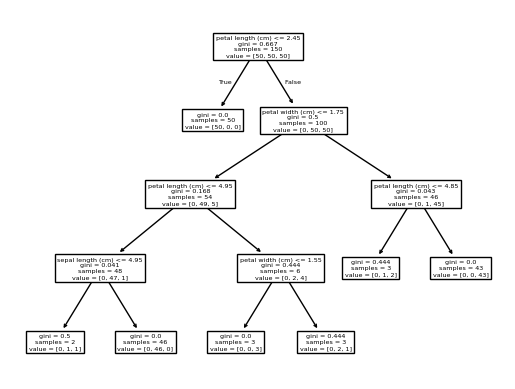

In [11]:
X2 = X[['sepal length (cm)', 'sepal width (cm)','petal length (cm)','petal width (cm)']]
tModel = DecisionTreeClassifier(max_depth = 4,min_samples_leaf=2, min_samples_split=5).fit(X2, y)
treePlot = plot_tree(tModel, feature_names=list(X2.columns), filled = False)
treePlot;


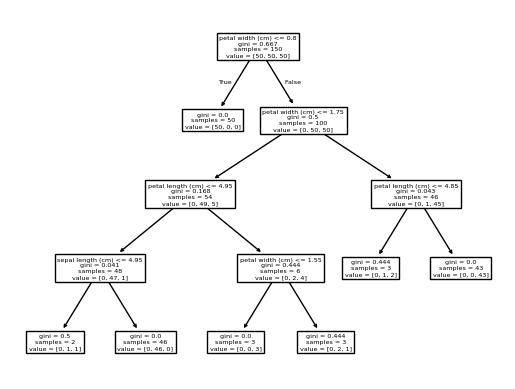

In [12]:
X2 = X[['sepal length (cm)', 'sepal width (cm)','petal length (cm)','petal width (cm)']]
tModel = DecisionTreeClassifier(max_depth = 5,min_samples_leaf=2, min_samples_split=5).fit(X2, y)
treePlot = plot_tree(tModel, feature_names=list(X2.columns), filled = False)
treePlot;


In [13]:
results = []

for i in range(1, 6):
    model = DecisionTreeClassifier(max_depth=i, min_samples_leaf=2, min_samples_split=5, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)


    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'max_depth': i,
        'recall': recall,
        'precision': precision,
        'f1': f1
    })


results_df = pd.DataFrame(results)

print(results_df)



   max_depth    recall  precision        f1
0          1  0.711111   0.855556  0.614815
1          2  0.977778   0.979365  0.977745
2          3  1.000000   1.000000  1.000000
3          4  1.000000   1.000000  1.000000
4          5  1.000000   1.000000  1.000000
